In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
subjectName=['s'+ str(i) for i in list(range(1,12))]
subjectName

['s1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11']

In [3]:
header=['target_val','target_aro']+subjectName

In [4]:
dfDataAro=pd.DataFrame.from_csv('data_aro.csv',header=None,index_col=None)
dfDataAro.columns=header
dfA=dfDataAro.set_index(['target_val','target_aro'])
dfA # AROUSAL

s1  s2  s3  s4  s5  s6  s7  s8  s9  s10  s11
target_val target_aro                                              
0.00       0.00         2   1   7   3   1   3   4   3   3    8    3
           0.50         3   1   7   5   4   5   4   3   3    7    7
           1.00         7   3   9   7   4   5   7   9   8    8    7
0.25       0.25         4   1   1   2   4   3   2   3   5    7    2
           0.75         5   1   7   6   6   5   4   6   6    7    7
0.50       0.00         2   1   1   3   6   3   2   1   5    4    5
           0.50         4   3   3   6   7   3   4   4   5    5    4
           1.00         7   3   5   6   5   5   4   8   7    8    6
0.75       0.25         4   1   3   6   5   2   3   2   4    5    3
           0.75         5   3   3   6   6   4   5   7   5    7    6
1.00       0.00         1   1   5   3   5   4   3   2   5    5    3
           0.50         2   2   7   4   5   4   3   4   4    5    6
           1.00         7   3   7   5   7   5   4   8   7    7    7

In [5]:
dfDataVal=pd.DataFrame.from_csv('data_val.csv',header=None,index_col=None)
dfDataVal.columns=header
dfV=dfDataVal.set_index(['target_val','target_aro'])
dfV # VALENCE

s1  s2  s3  s4  s5  s6  s7  s8  s9  s10  s11
target_val target_aro                                              
0.00       0.00         1   1   3   4   3   5   3   3   3    1    3
           0.50         3   4   3   4   4   5   3   3   7    2    3
           1.00         5   5   1   3   3   6   2   1   7    2    3
0.25       0.25         1   4   3   4   6   5   7   6   5    4    2
           0.75         7   5   9   4   4   6   6   5   4    3    5
0.50       0.00         1   3   3   5   2   6   2   3   4    3    3
           0.50         4   5   5   6   3   5   4   7   7    4    4
           1.00         6   6   7   6   7   6   3   6   9    3    5
0.75       0.25         3   5   7   8   7   5   7   7   7    7    6
           0.75         6   6   7   7   3   7   7   5   7    7    7
1.00       0.00         5   5   7   7   7   7   7   7   5    5    3
           0.50         3   6   3   5   7   5   8   5   7    5    6
           1.00         6   6   3   6   5   7   8   3   5    5    6

(0.0, 0.0)


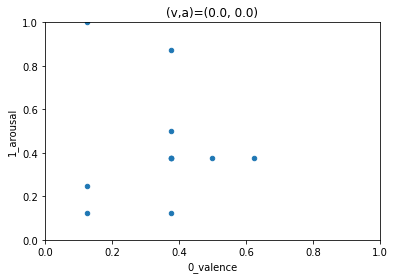

(0.0, 0.5)


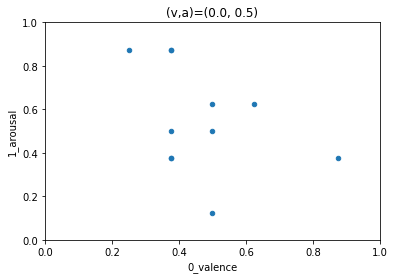

(0.0, 1.0)


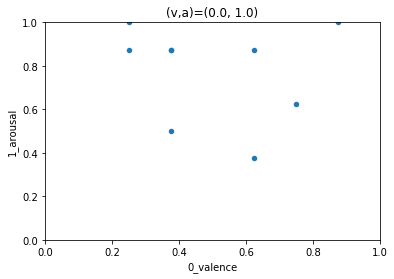

(0.25, 0.25)


(0.25, 0.75)


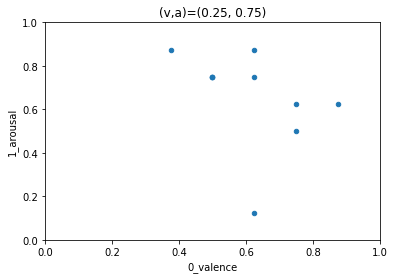

(0.5, 0.0)


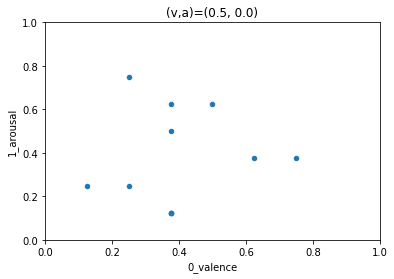

(0.5, 0.5)


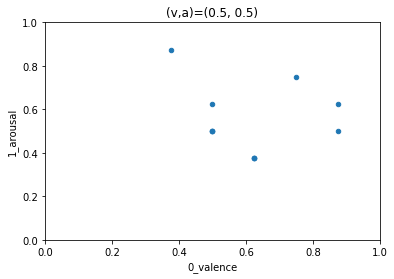

(0.5, 1.0)


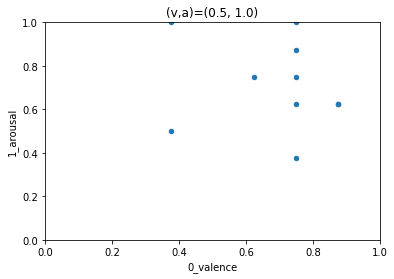

(0.75, 0.25)


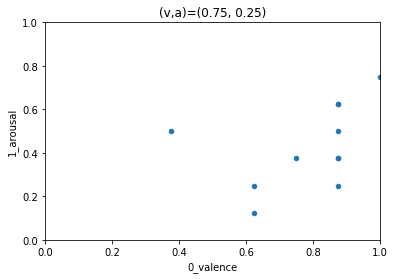

(0.75, 0.75)


(1.0, 0.0)


(1.0, 0.5)


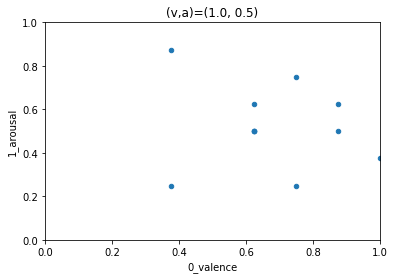

(1.0, 1.0)


In [6]:
def produceScatterPlotOfValenceArousalRatingForEachTargetCondition():
    SCALE_TO_NORMALIZE=8
    pdTarget=dict()
    for index,targetVA in enumerate(dfV.index):
        print(targetVA)
        pdTarget[targetVA]=pd.concat([dfV.loc[targetVA],dfA.loc[targetVA]],axis=1).T\
        .reset_index()\
        .drop(['level_0','level_1'],axis=1)\
        .T\
        /SCALE_TO_NORMALIZE
        pdTarget[targetVA].columns=['0_valence','1_arousal']
        pdTarget[targetVA].plot.scatter(
        x='0_valence',y='1_arousal'
        )
        plt.title('(v,a)='+str(targetVA))
        plt.xlim(0,8/SCALE_TO_NORMALIZE)
        plt.ylim(0,8/SCALE_TO_NORMALIZE)
        plt.show()
    return pdTarget
pdTarget=produceScatterPlotOfValenceArousalRatingForEachTargetCondition()

In [7]:
def computeAndDisplayInMeanStdFormatToCompareWithStefanTable1():
    pdStat=pd.DataFrame()
    for target in dfV.index:
        pdTemp=pdTarget[target].describe()[1:3].apply(
            lambda col:  '{:.2f}+/-{:.2f}'.format(col[0], col[1]),axis=0
        )
        pdTemp['targetVA']=str(target)
        pdStat=pd.concat([pdStat,pdTemp],axis=1)
    return pdStat
summaryStatistics=computeAndDisplayInMeanStdFormatToCompareWithStefanTable1()
summaryStatistics.T.set_index('targetVA')

0_valence    1_arousal
targetVA                              
(0.0, 0.0)    0.34+/-0.16  0.43+/-0.28
(0.0, 0.5)    0.47+/-0.17  0.56+/-0.25
(0.0, 1.0)    0.43+/-0.25  0.84+/-0.24
(0.25, 0.25)  0.53+/-0.22  0.39+/-0.23
(0.25, 0.75)  0.66+/-0.21  0.68+/-0.22
(0.5, 0.0)    0.40+/-0.18  0.38+/-0.22
(0.5, 0.5)    0.61+/-0.16  0.55+/-0.16
(0.5, 1.0)    0.73+/-0.22  0.73+/-0.20
(0.75, 0.25)  0.78+/-0.18  0.43+/-0.19
(0.75, 0.75)  0.78+/-0.16  0.65+/-0.18
(1.0, 0.0)    0.74+/-0.17  0.42+/-0.20
(1.0, 0.5)    0.68+/-0.20  0.52+/-0.19
(1.0, 1.0)    0.68+/-0.19  0.76+/-0.20